# UBER CASE STUDY
#### By Aditya Verma

#### Importing important libraies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading the Uber dataset for analysis
df = pd.read_csv(r'Datasets/Uber Request Data.csv')

In [5]:
# Printing first 5 values
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [50]:
df.isnull().sum(axis=0)  # Checking for values in the dataset

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [51]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [52]:
# Renaming the coulmns accordingly for convenience
df.rename(columns={'Request id':'request_id','Pickup point':'pickup_point',
                  'Driver id':'driver_id','Status':'status','Request timestamp':'request_time',
                  'Drop timestamp':'drop_time'},inplace=True)

In [53]:
df['request_time'].head(8)

0        11/7/2016 11:51
1        11/7/2016 17:57
2         12/7/2016 9:17
3        12/7/2016 21:08
4    13-07-2016 08:33:16
5    13-07-2016 21:57:28
6    14-07-2016 06:15:32
7    15-07-2016 05:11:52
Name: request_time, dtype: object

In [54]:
# Converting date and time in same format
df['request_time'] = pd.to_datetime(df['request_time'])

In [55]:
df.head(8)

,request_id,pickup_point,driver_id,status,request_time,drop_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52


In [56]:
# Seperating time and date
df['req_dates'] = pd.to_datetime(df['request_time']).dt.date

In [57]:
df['req_time'] = pd.to_datetime(df['request_time']).dt.time

In [58]:
df.head(5)

,request_id,pickup_point,driver_id,status,request_time,drop_time,req_dates,req_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16


In [59]:
# Renaming time and date column
df['dro_time'] = pd.to_datetime(df['drop_time']).dt.time

In [60]:
df['dro_date'] = pd.to_datetime(df['drop_time']).dt.date

In [61]:
df.head()

,request_id,pickup_point,driver_id,status,request_time,drop_time,req_dates,req_time,dro_time,dro_date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,2016-11-07,11:51:00,13:00:00,2016-11-07
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,2016-11-07,17:57:00,18:47:00,2016-11-07
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,2016-12-07,09:17:00,09:58:00,2016-12-07
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,2016-12-07,21:08:00,22:03:00,2016-12-07
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,09:25:47,2016-07-13


In [126]:
# Finding the distinct values in status columns
distinct_status = df['status'].unique()
print(distinct_status)

['Trip Completed' 'Cancelled' 'No Cars Available']


In [64]:
distinct_status_1 = ['Cancelled', 'No Cars Available', 'Trip Completed']

In [127]:
status_count = df.groupby('status')['request_id'].nunique()
print(status_count)

status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: request_id, dtype: int64


In [67]:
# Plotting the pie chart to have a look at the three distinct categories in status column
fig = plt.figure(figsize=(10, 7))
plt.pie(status_count, labels = distinct_status_1)

([<matplotlib.patches.Wedge at 0x183fdcfc6a0>,
 [Text(0.914812,0.610834,'Cancelled'),
  Text(-0.819798,0.733438,'No Cars Available'),
  Text(0.274502,-1.0652,'Trip Completed')])

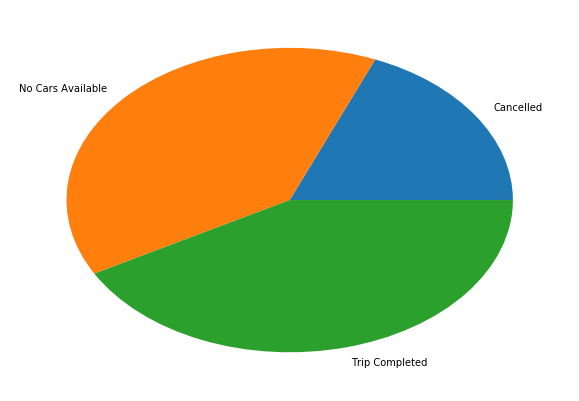

In [68]:
plt.show()

In [82]:
# Plotting a bar graph for the count of different status
status_of_ride = pd.crosstab(index = df['status'], columns='count')
status_of_ride.plot.bar()
plt.title('Reques vs. Status', fontsize=18)
plt.xlabel('Status of request')
plt.ylabel('No. of Request')


Text(0,0.5,'No. of Request')

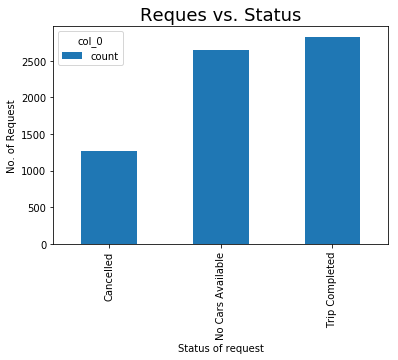

In [83]:
plt.show()

In [86]:
# Plotting a bar graph for analyzing the count of passengers w.r.t. their pickup port i.e. Airport or City
pick_point = pd.crosstab(index = df["pickup_point"], columns="count")     
pick_point.plot.bar()
plt.title('Request vs. Pickup Point', fontsize=18)
plt.xlabel('Pickup Point')
plt.ylabel('No. of Request')

Text(0,0.5,'No. of Request')

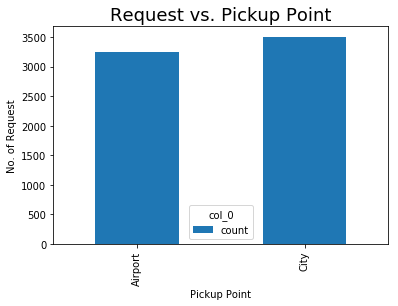

In [87]:
plt.show()

In [73]:
df['hours'] = df['req_time'].astype(str).str[0:2]
df['hours'] = df['hours'].astype(int)

'''Dividing the time of trips into 6 phases of days for convenience and assigning each phase
a name according to it’s time like, time between 00:00 to 04:59 is assigned as late night,
time between 05:00 to 08:59 as early morning, 09:00 to 11:59 as morning, 12:00 to 15:59
as afternoon, 16:00 to 19:59 as evening and 20:00 to 23:59 as night'''

In [76]:
conditions = [(df['hours']>=0)&(df['hours']<5), 
              (df['hours']>=5)&(df['hours']<9), 
              (df['hours']>=9)&(df['hours']<12),
             (df['hours']>=12)&(df['hours']<16), 
              (df['hours']>=16)&(df['hours']<20), 
              (df['hours']>=20)&(df['hours']<=24)]
values = ['late_night', 'early_morning', 'morning', 'afternoon', 'evening', 'night']
df['phase_of_day'] = np.select(conditions, values)

In [77]:
df.head()

,request_id,pickup_point,driver_id,status,request_time,drop_time,req_dates,req_time,dro_time,dro_date,hours,phase_of_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,2016-11-07,11:51:00,13:00:00,2016-11-07,11,morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,2016-11-07,17:57:00,18:47:00,2016-11-07,17,evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,2016-12-07,09:17:00,09:58:00,2016-12-07,9,morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,2016-12-07,21:08:00,22:03:00,2016-12-07,21,night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,09:25:47,2016-07-13,8,early_morning


In [128]:
pick_point = pd.crosstab(index = df["phase_of_day"], columns="count")     
pick_point.plot.bar()
plt.title('Request vs. Phase of day', fontsize=18)
plt.xlabel('Phase_of_day')
plt.ylabel('No. of Request')

Text(0,0.5,'No. of Request')

From the below bar graph, we can say that the number of requests for the ride are most
at early morning followed by evening and night, etc.

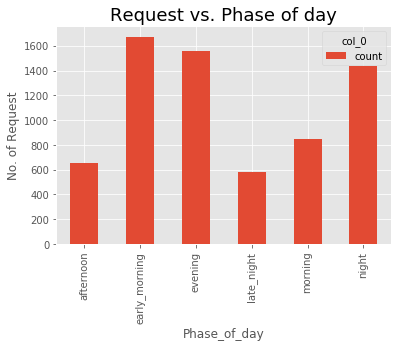

In [129]:
plt.show()

In [131]:
plt.style.use('ggplot')
colors = ["#0043ff", "#f6ff00","#65ff00"]
df.groupby(['phase_of_day','status']).status.count().unstack().plot.bar(legend=True, figsize=(15,5), color=colors)
plt.title('Count of all Trip Statuses in particular phase of a day')
plt.xlabel('Phase_of_day')
plt.ylabel('Count of Trip Status')

Text(0,0.5,'Count of Trip Status')

This bar depicts the relation between the total count of the trip statuses in a particular
phase of a day. From the below graph we can conclude that number of trips in which car
was not available were at the evening. And also, we see that the greatest number of trips
were cancelled at early morning. And finally, via this plot we can say that that the greatest
number of trips were completed successfully in early morning and at night.

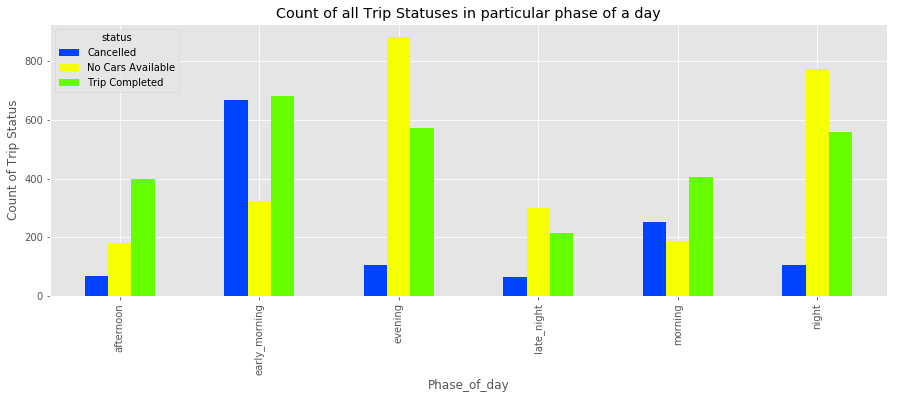

In [132]:
plt.show()

Observations:
- Maximum number of "No Cars Available" status trips can be seen in Evening Session, followed by Night session.
- Maximum number of "Cancelled" status trips can be seen in Early Morning Session, followed by Late Morning session.

In [103]:
# Filtering out only "Cancelled"  trips
df_cancelled=df[df["status"].str.contains('Cancelled')==True]
df_cancelled=df_cancelled.reset_index(drop=True)
df_cancelled.head()

,request_id,pickup_point,driver_id,status,request_time,drop_time,req_dates,req_time,dro_time,dro_date,hours,phase_of_day
0,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaN,2016-07-13,06:08:41,NaT,NaT,6,early_morning
1,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaN,2016-07-14,17:07:58,NaT,NaT,17,evening
2,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaN,2016-07-14,20:51:37,NaT,NaT,20,night
3,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaN,2016-07-15,10:12:40,NaT,NaT,10,morning
4,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaN,2016-12-07,19:14:00,NaT,NaT,19,evening


In [133]:
plt.style.use('ggplot')
colors = ["#0043ff", "#65ff00"]
df_tripscancelled.groupby(['phase_of_day','pickup_point']).pickup_point.count().unstack().plot.bar(legend=True, 
                                                                                                   figsize=(15,5), color=colors)
plt.title('Count and Distribution of all "Cancelled" Trips in a day')
plt.xlabel('Phase of Day')
plt.ylabel('No. of "Cancelled" Trips')

Text(0,0.5,'No. of "Cancelled" Trips')

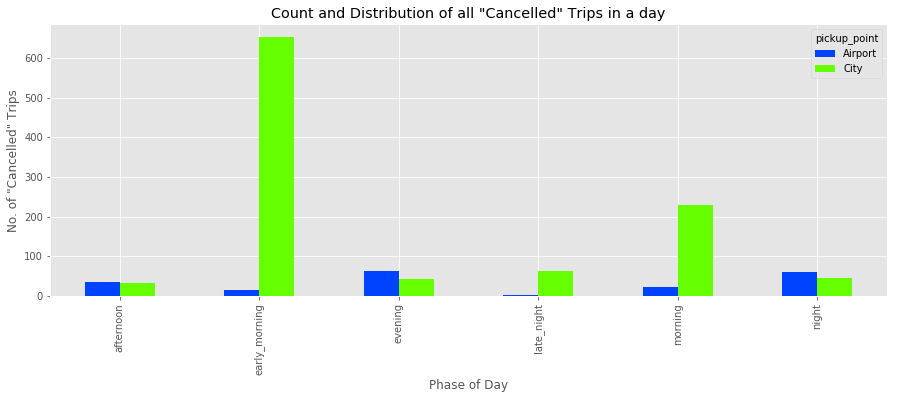

In [134]:
plt.show()

Observation
- Maximum Cancellations happen in "Early Morning" session where the pick up is "City", followed by Late Morning session. 
- Most number of cancellations happen in the Morning hours in the City to Airport route.

In [110]:
# Filtering out no cars available for the trips
df_no_car=df[df["status"].str.contains('No Cars Available')==True]
df_no_car=df_no_car.reset_index(drop=True)
df_no_car.head()

,request_id,pickup_point,driver_id,status,request_time,drop_time,req_dates,req_time,dro_time,dro_date,hours,phase_of_day
0,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaN,2016-11-07,00:02:00,NaT,NaT,0,late_night
1,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaN,2016-11-07,00:06:00,NaT,NaT,0,late_night
2,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaN,2016-11-07,00:09:00,NaT,NaT,0,late_night
3,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaN,2016-11-07,00:23:00,NaT,NaT,0,late_night
4,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaN,2016-11-07,00:30:00,NaT,NaT,0,late_night


In [135]:
plt.style.use('ggplot')
colors = ["#0043ff", "#65ff00"]
df_no_car.groupby(['phase_of_day','pickup_point']).phase_of_day.count().unstack().plot.bar(legend=True, 
                                                                                           figsize=(15,5), color=colors)
plt.title('Count and Distribution of all "No cars available" Trips in a day')
plt.xlabel('Phase of Day')
plt.ylabel('No. of "No cars available" Trips')

Text(0,0.5,'No. of "No cars available" Trips')

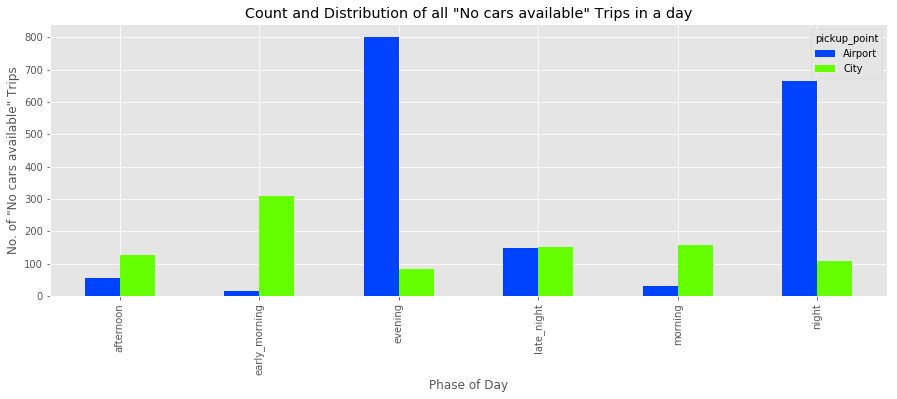

In [136]:
plt.show()

Observation
- Maximum "No Cars Available" trips happen in "Evening" session where the pick up is "Airport", followed by Night session.
- Most number of No Cars Available happen in the Evening Hours in the Airport to City route

# Supply Demand Curve

Lets Try to understand the Supply and Demand curve by considering all Trips Completed as Supply and Cancelled and No Cars Available as Demand

In [120]:
df['supply_demand'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in df['status']]

,request_id,pickup_point,driver_id,status,request_time,drop_time,req_dates,req_time,dro_time,dro_date,hours,phase_of_day,supply_demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,2016-11-07,11:51:00,13:00:00,2016-11-07,11,morning,Supply
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,2016-11-07,17:57:00,18:47:00,2016-11-07,17,evening,Supply
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,2016-12-07,09:17:00,09:58:00,2016-12-07,9,morning,Supply
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,2016-12-07,21:08:00,22:03:00,2016-12-07,21,night,Supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,09:25:47,2016-07-13,8,early_morning,Supply


In [ ]:
df.head()

In [152]:
#Plotting Supply and Demand on the City to Airport Route
df_citytoairport_supplydemand=df[df["pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
df_citytoairport_supplydemand.groupby(['phase_of_day',
                                       'supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,5))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('phase_of_day')
plt.ylabel('Supply/Demand')

Text(0,0.5,'Supply/Demand')

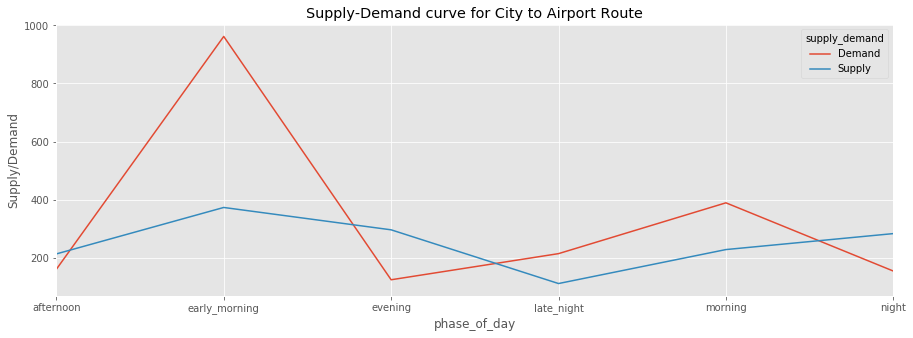

In [153]:
plt.show()

We observe that the Demand is very high in the morning from City to Airport route but the supply is very low

In [157]:
#Plotting Supply and Demand on the Airport to City route
df_airporttocity_supplydemand=df[df["pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
df_airporttocity_supplydemand.groupby(['phase_of_day',
                                       'supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,5))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Phase_of_day')
plt.ylabel('Supply/Demand')

Text(0,0.5,'Supply/Demand')

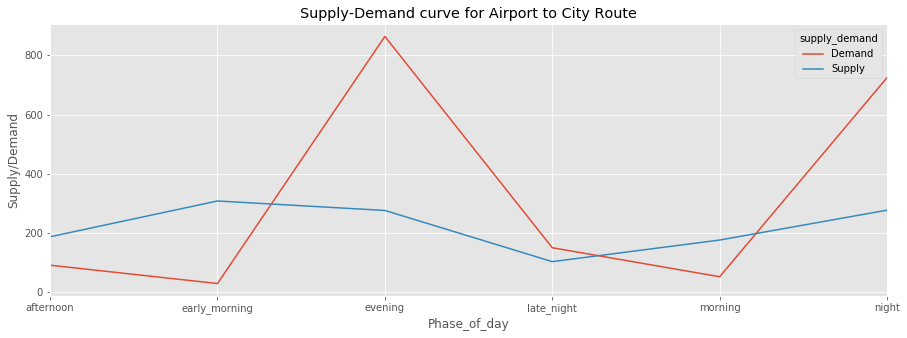

In [158]:
plt.show()

We observe that the Demand is very high in the evening in the Airport to City route but the supply is very low

From these two above Supply-Demand plots we can say that,
The demand during the morning and afternoon hours from the Airport to City is quite
low, that means the driver who completed a City to Airport route in the morning hours
may have to wait for long time to get ride back to the city, or he/she might come back
to city without any passengers. Both the situations are not idle for the drivers, which
might be the reason for highest number of cancelled trips which are from city to airport
in morning hours.
Hence, the vice-versa happens in evening when there are too many flights coming in to
the airport and hence there is a high demand for cabs and not enough supply, as a result
more ‘No cars available’ were observed in evening in Airport to City route.

Solution Possible:
Give incentives/surge pricing/bonus for trips from City to Airport during Morning hours.
Give incentives/surge pricing/bonus for trips from Airport to City during Evening hours.
Uber can give Gas expense to drivers when they return from Airport without a ride or
go to Airport for pickup without a ride. Uber can increase market share by marketing
campaign and offers to customers when demand is too low.

# Thank you

Name- Aditya Verma

Email: arrowav36@gmail.com

Blog link: https://pythonarrow.blogspot.com/

For any queries you can contact me on my Email directly also have a look at my blog for further learning in the field of data science.